# Genre Classification of TV Shows

**Submission deadline: Friday 26 May, 11:55pm**

**Assessment weight: 25% of the total unit assessment.**

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end genre classification application. We will train and test the data using the TVmaze data set.

TVmaze is a free online television information database that provides users with detailed information about TV shows, their episodes, and their schedules. The website was launched in 2005 and has since grown to become one of the most comprehensive TV databases available.

### Genre

To reduce opportunities for copying and cheating, you will given a mostly-unique genre to work with. Add it to the next cell. Email Abid (or ask him when you see him) for your preference; if too many people have chosen that genre, he might ask you to pick again.

Possibilities are:

- Drama

- Comedy

- Romance

- Crime

- Action

- Adventure

- Anime

- Mystery

- History

- Children

- Thriller

- Fantasy

- Science-Fiction

- Family

- Food

- Music

- Travel

- Sports

- Nature

In [206]:
assigned_genre = 'Music'

To make sure everyone has unique data (even if you share a genre), several questions will ask you
to initialize a random number generator with `random_state_key`. Pick some number that is likely
to be unique to you (e.g. the digits from your student number).

In [207]:
# Replace 12345 with the digits from your student number, or some other number that is likely to be unique.
random_state_key = 45761000

### Data

You will find a SQLite database (called `tvmaze.sqlite`) on iLearn. This is the data you will work from. Copy it into the same directory where you have put this jupyter notebook.

The following cell should create a connection for you.

In [208]:
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect("tvmaze.sqlite")

### Character Data

In a few places, you will be asked to run queries on the names of characters.

The following cell creates a dataframe called `characters_df` using this query:

`select tvmaze_id, tvmaze_character_id, name from tvmaze_casting join tvmaze_characters using (tvmaze_character_id);`

In [209]:
import pandas as pd

# Define the SQL query
sql_query = """
select tvmaze_id, tvmaze_character_id, name
from tvmaze_casting join tvmaze_characters
using (tvmaze_character_id);
"""

# Read the data into a pandas dataframe
characters_df = pd.read_sql_query(sql_query, connection)

If you aren't familiar with pandas, and just want to use raw `numpy`, you can use the `characters` array
created in the next cell.

In [210]:
characters = characters_df.to_numpy()
characters.shape, characters.dtype

((209697, 3), dtype('O'))

And to make it a little easier, here are the character names extracted as a list.

In [211]:
character_names = list(characters[:,2])

['You Yuan Le',
 'Lin An An',
 'Ren Hao',
 'Ye Luo Sha',
 'Sung Yi Gyum',
 'Hong Da In',
 'Sung Yi Bum',
 'Park Chun Sam',
 'Mio Meguro',
 'Iwa Yotsuya',
 'Ryo Sakai',
 'Utako Warabe',
 'Miyuki Yamanaka',
 'Sara Yanagi',
 'Yuzuru Minaoka',
 'Hibito Harashima',
 'Hiyo Numata',
 'Sgt. Bill Parkin (Sarge)',
 'PC Eric Warren (Token)',
 'PC John Barrett (Thug)',
 'PC Gill Copson (Dippy)',
 'PC Roger Tennant (Flub)',
 'PC Lionel Adams (Oz)',
 'PC Susan Li (Bruce)',
 'PC Ian Macrae (Jock)',
 'PC Wayne Cheetham (Bog)',
 'Supt. Hallsworth',
 'DI Overton',
 'DCI Chivers',
 'PC Goole',
 'DC Stoppard',
 'Tracy Collins',
 'Linda Eide',
 'Robert Kingsford',
 'Dr. Christine Fletcher',
 'Dr. Mike Gregson',
 'Dr. Louise Macken',
 'Dr. Stuart Phelan',
 'Dr. David Scobie',
 'Cathy Jordan',
 'Judy Enshaw',
 'Terry Harker',
 'Yvonne Silver',
 'Dr. Andrew Argyle',
 'Dr. Kate Brady',
 'Samantha Docherty',
 'Jack Turner',
 'Dr. Raz Amin',
 'Dr. Ruth Cole',
 'Dr. Danny Barton',
 'Poppy Jonston',
 'Dr. Jeffrey 

### Show data

You might want to start with 200 shows so that your program runs faster, and then later on replace it with
500, or 1000 if you need more data.

In [7]:
data_size = 1000

The following cells create:

- A dataframe called `show_df` (if you are familiar with pandas)

- A numpy array called `shownames` (the names of the shows to work with)

- A numpy array called `descriptions` (which has the show descriptions)

- A numpy array called `in_genre` (whether this show is in your target genre or not)

- A numpy array called `tvmaze_ids` (the ID numbers of the shows).

In [8]:
out_of_genre_sql_query = f"""
select tvmaze_id, showname, description, 0.0 as in_genre from tvmaze
where tvmaze_id not in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10"""

in_genre_sql_query = f"""select tvmaze_id, showname, description, 1.0 as in_genre from tvmaze
where tvmaze_id in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10
"""

out_of_genre_df = pd.read_sql(out_of_genre_sql_query, connection)
in_genre_df = pd.read_sql(in_genre_sql_query, connection)
show_df = pd.concat([out_of_genre_df.sample(data_size, random_state=random_state_key), 
                     in_genre_df.sample(data_size, random_state=random_state_key)])
show_df

tvmaze_id                                showname  \
45700      55905                             The Watcher   
37641      45586  Housekishou Richard-shi no Nazo Kantei   
9696       11071                        Dear Green Place   
16149      19112            A History of Ancient Britain   
19488      23252                           5 News Update   
...          ...                                     ...   
440        17962       Sounds of the Sixties: Reversions   
524        21746                           The Gong Show   
1575       67410          People's Choice Country Awards   
755        30104                       Lotta på Liseberg   
461        18879                             ¡Qué noche!   

                                             description  in_genre  
45700  <p>Based on a true story, <b>The Watcher</b> f...       0.0  
37641  <p>The novel follows Richard Ranashinha Dvorpi...       0.0  
9696   <p>Sitcom focusing on the antics of two Glaswe...       0.0  
16149  <p>Neil Oliver tells the epic story of how Bri...       0.0  
19488    <p>The latest headlines, sport and weather.</p>       0.0  
...                                                  ...       ...  
440    <p>Series featuring rock, pop and R&amp;B perf...       1.0  
524    <p><b>The Gong Show</b> is an updated version ...       1.0  
1575   <p>The only award show for the people and by t...       1.0  
755    <p>Lotta at Liseberg is a live music show with...       1.0  
461    <p><b>¡Qué Noche! Con Angélica y Raúl</b> is a...       1.0  

[2000 rows x 4 columns]

In [9]:
show_ids = show_df.tvmaze_id.to_numpy()
descriptions = show_df.description.to_numpy()
in_genre = show_df.in_genre.to_numpy()
shownames = show_df.showname.to_numpy()

## Task 1 (3 marks) - Regular expressions

### 1.1 (1 mark)

We all know that James Bond gets his gadgets from Q. Are there other shows where a character has a 
one-letter name?

Write a regular expression that matches a single upper-case letter, and use it to check against
the characters in `character_names`.

How many shows do you find?

In [212]:
import re
import pandas as pd

pattern = r"^[A-Z]$"
r = re.compile(pattern)

# Find the single letter names that match the regex expression from the characters list
single_char_names = list(filter(r.match, characters_df['name']))

# Find the shows with the single letter character names
single_char_names_shows = characters_df[characters_df['name'].isin(single_char_names)]

# Count the number of unique shows
num_shows = single_char_names_shows['tvmaze_id'].nunique()

print("The number of unique shows with single-letter name characters:", num_shows)
print(single_char_names_shows)



The number of unique shows with single-letter name characters: 42
        tvmaze_id  tvmaze_character_id name
1788        51049               791436    R
2222        50950               790192    C
8327        49015               761244    N
11749       47370               724469    Q
14850       45569               685521    P
19376       42950               642128    Q
33359       36703               529998    K
37178       34886               507052    M
44836       31447               460243    K
49099       29194               434886    K
49462       29081               433306    L
60041       25087               378829    S
60420       24959               378618    N
72665       20377               318013    Y
81857       17534               289772    G
87304       15892               272551    A
91103       14590               297808    N
109851       8398               202984    Z
110291       8284               284786    K
110731       8211               201548    X
116947    

### 1.2 (1 mark)

Write a regular expression that finds medical doctors. A medical doctor might be "Dr." or "Doctor" or "Dr".

Watch out for:

- JUDr. Augusta (who has a PhD in law)

- MUDr. Sova (who is a doctor)

- The Doctor (a science fiction character, who isn't a medical doctor)

- The Sixth Doctor (the same science fiction character, there are fifteen of them)

Assume that Dr. Death and Dr. Teeth are doctors.

In [215]:
pattern = r"\b(Dr\.|Dr|Doctor)\s+([A-Z][a-z]+)\b(?<!JUDr)(?<!MUDr)"
# Define the regular expression pattern to match medical doctor names.
# The pattern matches variations of "Dr.", "Dr", or "Doctor" followed by a space and a name.
# The negative lookbehinds, (?<!JUDr) and (?<!MUDr), exclude cases where "JUDr" or "MUDr" precedes the doctor name.

doctor_names = characters_df['name'].str.extract(pattern)
# Extract the doctor names from the 'name' column of the characters DataFrame using the regular expression pattern.

md_names = doctor_names.dropna()[0] + ' ' + doctor_names.dropna()[1]
# Combine the extracted doctor titles and names to form the full medical doctor names.
# dropna() removes any rows with missing values, and [0] and [1] select the columns containing the doctor titles and names.

print(md_names)
print("Total Doctors",len(md_names))
# Print the full medical doctor names.


34         Dr. Christine
35              Dr. Mike
36            Dr. Louise
37            Dr. Stuart
38             Dr. David
               ...      
209445    Dr. Phosphorus
209479          Dr. Josh
209480         Dr. Carol
209636        Dr. Farrah
209674          Dr. Gina
Length: 2064, dtype: object
Total Doctors 2064


### 1.3 (1 mark)

Write a regular expression to find Cyrillic alphabet character names.

In [216]:
pattern = r'[\u0400-\u04FF]+'
# Define the regular expression pattern to match character names with Cyrillic letters.
# The pattern represents the Unicode code point range for Cyrillic characters.

cyrillic_names = characters_df[characters_df['name'].str.contains(pattern)].name
# Filter the 'name' column of the characters_df DataFrame to find the character names that contain Cyrillic letters.
# The filter uses the regular expression pattern and returns the 'name' column.

cyrillic_names
# Display the character names with Cyrillic letters.


103                  Ирина
104               Геннадий
105       Наталья Ивановна
156           Даня Крастер
163                Ведущий
                ...       
209130           Член жюри
209131             Ведущая
209257             Ведущий
209258             Ведущий
209673             Ведущий
Name: name, Length: 23228, dtype: object

## Task 2 (5 marks) - lexico-semantic preparation for a classifier

For this task only, consider the output of `nltk.word_tokenize()` to be 
what we mean by a "word". Be case insensitive (i.e. lowercase all
texts before processing).

### Task 2.1 (2 marks)

Calculate:

- two measures of the corpus size: the total number of words used in all descriptions, and the total number of TV shows

- the total number of distinct words in the descriptions (the vocabulary size)

- the average number of words in each description (i.e. the average document length)

- the average appearance count of each word (the hit ratio for search)

- the coefficients of Herdan's Law

Make a log-log plot to confirm that the data follows Herdan's Law. 

In [217]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Total Number of TV Shows
total_shows = show_df['tvmaze_id'].nunique()
print("Total number of tv shows: ", total_shows)

Total number of tv shows:  2000


In [218]:
# Dictionary Used
variable_corpus_data = {}

# Insert keys into dict for every 500 increments until it reaches total number of tv shows

for i in range(500, total_shows + 1, 500):
    variable_corpus_data[i] = {}

# Iterate over different corpus sizes
for doc_size in variable_corpus_data.keys():
    corpus_words = []
    show_count = show_df.shape[0]

    # Sample a subset of TV show descriptions
    subset_df = show_df.sample(doc_size, random_state=random_state_key)

    # Tokenize and collect words from the descriptions
    subset_df['description'].str.lower().apply(nltk.word_tokenize).apply(corpus_words.extend)

    # Store the corpus words in variable_corpus_data
    variable_corpus_data[doc_size]['corpus'] = corpus_words
    
for key in variable_corpus_data.keys():
    print(f"Corpus size: {key} shows, {len(variable_corpus_data[key]['corpus'])} words")


Corpus size: 500 shows, 36192 words
Corpus size: 1000 shows, 74068 words
Corpus size: 1500 shows, 113455 words
Corpus size: 2000 shows, 151381 words


In [219]:
  print(f"Corpus size: {total_shows} shows, {len(variable_corpus_data[total_shows]['corpus'])} words")

Corpus size: 2000 shows, 151381 words


In [33]:
# Iterate over different corpus sizes
for key in variable_corpus_data.keys():
    print(f"Corpus size: {key} shows, {len(variable_corpus_data[key]['corpus'])} words")

    current_corpus = variable_corpus_data[key]['corpus']
    vocabulary_size = set(current_corpus)
    variable_corpus_data[key]['vocabulary_size'] = vocabulary_size

    print(f'Corpus size: {key} shows')
    print(f'\tVocabulary size: {len(vocabulary_size)}')  # Unique words
    print(f'\tAverage number of words per description: {len(current_corpus) / key}')
    print(f'\tHit Ratio {len(current_corpus) / len(vocabulary_size)}')
    print()

    average_appearance = {}

    for word in vocabulary_size:
        # Calculate the average appearance count for each word
        average_appearance[word] = (current_corpus.count(word) / len(vocabulary_size)) * key

    # Store the average appearance count in variable_corpus_data
    average_appearance = pd.Series(average_appearance)
    variable_corpus_data[key]['average_appearance'] = average_appearance


Corpus size: 500 shows, 36192 words
Corpus size: 500 shows
	Vocabulary size: 6779
	Average number of words per description: 72.384
	Hit Ratio 5.338840536952353

Corpus size: 1000 shows, 74068 words
Corpus size: 1000 shows
	Vocabulary size: 10811
	Average number of words per description: 74.068
	Hit Ratio 6.851170104523171

Corpus size: 1500 shows, 113455 words
Corpus size: 1500 shows
	Vocabulary size: 14028
	Average number of words per description: 75.63666666666667
	Hit Ratio 8.087753065297976

Corpus size: 2000 shows, 151381 words
Corpus size: 2000 shows
	Vocabulary size: 16757
	Average number of words per description: 75.6905
	Hit Ratio 9.033896282150742



k = 5.4122565393231525
beta = 0.6792076835380089


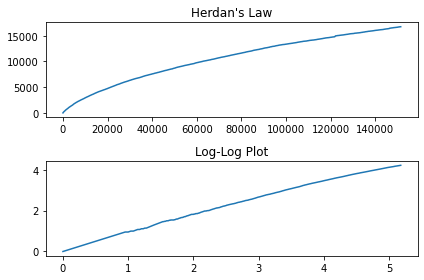

In [42]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the list of all words from descriptions
words_desc = []
for description in show_df['description']:
    description = description.lower()
    words = word_tokenize(description)
    words_desc.extend(words)

# Initialize variables
vocab_so_far = set()
vocab_sizes = []
word_counts = []
log_word_counts = []
log_vocab_sizes = []

# Calculate vocabulary sizes, word counts, and their logarithmic values
for i, word in enumerate(words_desc):
    vocab_so_far.update([word])
    vocab_sizes.append(len(vocab_so_far))
    word_counts.append(i + 1)
    log_word_counts.append(math.log10(i + 1))
    log_vocab_sizes.append(math.log10(len(vocab_so_far)))

# Create pandas Series for data
herdans_data = pd.Series(data=vocab_sizes, index=word_counts)
log_data = pd.Series(data=log_vocab_sizes, index=log_word_counts)

# Fit a linear model to estimate the coefficients
beta, log_k = np.polyfit(log_word_counts, log_vocab_sizes, 1)
k = 10 ** log_k

# Print the values of k and beta
print("k =", k)
print("beta =", beta)

# Plot log-log graph
fig, axes = plt.subplots(nrows=2)
herdans_data.plot(ax=axes[0], title="Herdan's Law")
log_data.plot(ax=axes[1], title="Log-Log Plot")
fig.tight_layout()
fig.savefig('herdans.png')


## Analysis
A beta value of around 0.7 suggests that there are relatively fewer word repetitions occurring in the descriptions. This indicates that the authors of the descriptions tend to be concise and provide to-the-point information. The log-log curve and Herdan's Law curve are consistent with the expected formulae.

As the number of words increases, the vocabulary size also tends to increase, assuming all other parameters remain unchanged. This aligns with our expectations, as a larger corpus typically leads to a broader range of unique words.

The log-log curve shows a linear relationship between the logarithm of word count and the logarithm of vocabulary size, indicating a power-law relationship. On the other hand, Herdan's Law curve demonstrates the curvature expected from the power function.

Overall, these observations support the theoretical expectations derived from the model's formulae and provide insights into the characteristics of the descriptions in relation to word repetitions, vocabulary size, and the relationship between word count and vocabulary size.

### 2.2 (1 mark)

Calculate the current ratio of distinct vocabulary items to documents, and compare it
to theoretical prediction from the formula:

$$
    \frac{C}{V} = \frac{ N^{1 - \beta}}{k L}
$$

Where

- $C$ is the number of *documents* in the corpus.
- $L$ is the average length of a document in the corpus
- $V$ is the number of distinct vocabulary items
- $N$ the number of words in the corpus
- $k$ and $beta$ are the values you derived in the previous exercise.

In [43]:
for key in variable_corpus_data.keys():
    current_corpus = variable_corpus_data[key]['corpus']
    current_vocab_size = len(variable_corpus_data[key]['vocabulary_size'])
    current_cv_ratio = key / current_vocab_size

    L = len(current_corpus)/key

    print(f'Corpus size: {key} shows')
    print(f'\tC/V ratio: {current_cv_ratio}')
    print(f'\tHerdan\'s Law ratio: {len(current_corpus) ** (1-beta) / (k * L)}')
    print()

Corpus size: 500 shows
	C/V ratio: 0.0737571913261543
	Herdan's Law ratio: 0.07401963474054858

Corpus size: 1000 shows
	C/V ratio: 0.09249838127832763
	Herdan's Law ratio: 0.09101879770738162

Corpus size: 1500 shows
	C/V ratio: 0.10692899914456801
	Herdan's Law ratio: 0.10219692532366857

Corpus size: 2000 shows
	C/V ratio: 0.11935310616458793
	Herdan's Law ratio: 0.11202303796806906



### 2.3 (0.5 marks)

Based on your answer to 2.2, you can reasonably expect that one of the
best ways to improve our classifier will be to add more documents.

If current trends continue, TVmaze will have information for a million
shows in should happen in 2045.

What would you expect for the following:

- $C/V$

- The total vocabulary size (using Herdan's Law)


In [46]:
N_predicted = (len(variable_corpus_data[total_shows]['corpus']) / total_shows) * 1_000_000

# Predict vocabulary size using Herdan's Law formula
V_predicted = k * N_predicted ** beta
print(f'Vocabulary size for 1,000,000 shows: {V_predicted}')

# Calculate the C/V ratio
C_V_ratio = 1_000_000 / V_predicted
print(f'C/V ratio for 1,000,000 shows: {C_V_ratio}')


Vocabulary size for 1,000,000 shows: 1215860.680350382
C/V ratio for 1,000,000 shows: 0.8224626523096575


## Analysis
According to Herdan's Law, the vocabulary size tends to increase as the corpus size grows.The C/V ratio, representing the ratio of shows to vocabulary size, is expected to increase with the corpus size, as indicated by the formula in section 2.2. Under Herdan's Law, the vocabulary size (V) increases at a slower rate compared to a linear function. This means that as we have more documents in the corpus, each word becomes more valuable in differentiating the genres of various documents. This assumes that the growth of the vocabulary size is slower and the model parameters remain constant

### 2.4 (0.5 marks)

You will use this answer to tune the classifier in Task 4.

We should exclude happax legomena from the vocabulary, since they cannot be useful to the classifier.

How many words of vocabulary remain?

In [56]:
current_corpus = variable_corpus_data[total_shows]['corpus']

# Remove words that appear only once (hapax legomena)
current_corpus = [word for word in current_corpus if current_corpus.count(word) > 1]

# Calculate the vocabulary size without hapax legomena (words that appear only once)
vocab_for_tuning = len(set(current_corpus))

print(f'Vocabulary size without hapax legomena: {vocab_for_tuning}')


Vocabulary size without hapax legomena: 7488


### 2.5 (1 mark)

We have mentioned Chollet's heuristic in class:

> It turns out that when approaching a new text-classification task, you should pay close attention to the ratio between the number of samples in your training data and the mean number of words per sample (see figure 11.11). If that ratio is small—less than 1,500—then the bag-of-bigrams model will perform better (and as a bonus, it will be much faster to train and to iterate on too). If that ratio is higher than 1,500, then you should go with a sequence model.

Calculate this ratio.

In [57]:
current_corpus = variable_corpus_data[total_shows]['corpus']
num_samples = total_shows
average_num_words = len(current_corpus)/num_samples
print("The Chollet's heristics is:", num_samples/average_num_words)

The Chollet's heristics is: 26.423395274175753


## Task 3 (5 marks) - Information retrieval

In this task you are going to create a naive search engine that will let you find a "similar"
TV show.

Here is a randomly-selected show for you to use in this section. You will also use the data
in `show_df`.

In [58]:
selected_show = show_df[show_df.in_genre == 1.0].sample(n=1, random_state=random_state_key)
selected_show.T

469
tvmaze_id                                                19360
showname                                          Let It Shine
description  <p>Gary Barlow will lead the search for a band...
in_genre                                                   1.0

In [59]:
selected_show.iloc[0].description

"<p>Gary Barlow will lead the search for a band to star in a new stage show featuring the songs of Take That. The show will see Gary search for performers to take part in a competition to find a new band to star in a stage show featuring the music of the popular group.</p><p>The start of the eight-week competition will be filmed in Salford in front of a live audience. The public can apply for tickets to watch the recordings. It's fitting that the search is starting in Salford as Take That were formed in neighbouring Manchester and the city is considered the 'spiritual home' of the band.</p>"

### 3.1 (2 marks)

Vectorise the `description` of each show using TFIDF. 

- Vectorise words and bigrams

- Only include words and bigrams that appear twice

- Only include words and bigrams that appear in less than 50% of the descriptions

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
#min_df to ensure bigram
# max_df to ensure appear in less than 50% documents
# Initialize the TfidfVectorizer with specified parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))

# Fit the vectorizer on the descriptions in the show dataframe
vectorizer.fit(show_df.description)

# Transform the selected show's description using the fitted vectorizer
vectorized_show = vectorizer.transform(selected_show.description)

#Showing details
vectorized_show

<1x17721 sparse matrix of type '<class 'numpy.float64'>'
	with 103 stored elements in Compressed Sparse Row format>

### 3.2 (1 mark)

Write code that shows the size of this new vocabulary (the total number of words and bigrams).

In [64]:
print(f'Vocabulary size for vectorized show: {vectorized_show.shape[1]}')

Vocabulary size for vectorized show: 17721


### 3.3 (2 marks)

Iterate over the shows that don't have your genre to find the show whose description is most
similar (using cosine similarity) to the show that was chosen for you.

That is, you should end up with a show that:

- Has a very similar description to the show described at the start of Task 3

- Belongs to a diffferent genre.



In [71]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
vectorizer.fit(show_df.description)

# Vectorize the description of the chosen show
chosen_vec = vectorizer.transform([selected_show.iloc[0].description])

# Calculate cosine similarities between chosen show and all shows
cosine_similarities = cosine_similarity(chosen_vec, vectorizer.transform(show_df.description))
cosine_similarities = cosine_similarities[0]

# Find the index of the most similar show (excluding shows from the same genre)
most_similar_index = np.argmax(cosine_similarities * (1 - show_df.in_genre))

# Retrieve the description of the most similar show
most_similar_description = show_df.iloc[most_similar_index].description

# Print the description of the most similar show
print("The show that is most similar (excluding those of the same genre) to our chosen one is:")
print(most_similar_description)


The show that is most similar (excluding those of the same genre) to our chosen one is:
<p><b>Dream Home Dilemma</b> sees our expert real estate hosts Shane Cortese, Anita Dobson and Hamish Dodd, guide house hunters on the search for their dream home.</p>


## Task 4 (10 marks) - detect genres

In this task, we'll be building a naively simple model for identifying TV genres.

### 4.1 (1 mark)

Use an sklearn function to break your dataset into a training set, and a test set. 

Set the random number initializer to your 
`random_state_key` so that this notebook always returns the same results.

In [115]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
training, test = train_test_split(show_df, test_size=0.2, random_state=random_state_key)

# 10% Validation data
training, val = train_test_split(training, test_size = 0.1, random_state = random_state_key)

# Print the number of training samples
print(f'Number of training samples: {len(training)}')

# Print the number of test samples
print(f'Number of test samples: {len(test)}')


# Print the number of Val samples
print(f'Number of validation samples: {len(val)}')

Number of training samples: 1440
Number of test samples: 400
Number of validation samples: 160


### 4.2 (1 mark)

Create a vectorizer for your data, and prepare it on the descriptions in the training data. 

Set `max_tokens` to the value in your answer from 2.4 (plus 1 for the "unknown" token).

(The vectorizer you used in section 3.1 was trained on all data, not just your training data,
so cannot be re-used here without leaking test information into the training data.)

It should use TFIDF weighting. 

In [116]:
import keras

# declare a vectorizer
vectorizer = keras.layers.TextVectorization(output_mode='tf_idf', max_tokens = vocab_for_tuning+1) 

# adapt on training data
vectorizer.adapt(training['description'])

### 4.3 (1 mark)

Use the vectorizer to transform the training and test data

In [117]:
train_transformed = vectorizer(training['description'])
test_transformed  = vectorizer(test['description'])
val_transformed = vectorizer(val['description'])

In [118]:
train_transformed[0]

<tf.Tensor: shape=(7489,), dtype=float32, numpy=
array([5.8259926, 1.5634011, 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)>

In [119]:
test_transformed[0]

<tf.Tensor: shape=(7489,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [120]:
val_transformed[0]

<tf.Tensor: shape=(7489,), dtype=float32, numpy=
array([58.259926 ,  0.       ,  1.6394198, ...,  0.       ,  0.       ,
        0.       ], dtype=float32)>

### 4.4 (2 marks)

We are creating a logistic regression model using Keras, which we will use
to predict the genre of a TV show based on its description.

Create a model based on the following:

- An input layer with a shape based on the size of the vocabulary from your vectorization.

- An output layer that uses a sigmoid activation function.

Compile your model (choose an appropriate loss, and add 'accuracy' as a metric) and display a summary of it.

In [129]:
import tensorflow as tf
from keras.layers import Dense, Input

model_inputs = keras.Input(shape=(vocab_for_tuning+1,))
model_outputs = Dense(1, activation='sigmoid')(model_inputs)

model = keras.Model(inputs = [model_inputs], outputs = [model_outputs])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 7489)]            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 7490      
                                                                 
Total params: 7,490
Trainable params: 7,490
Non-trainable params: 0
_________________________________________________________________


### 4.5 (1 mark)

Fit the model to the training data. The target variable is `in_genre`.
Hold out 10% of the data as validation data. Stop when the loss in the 
validation data stops improving.

In [130]:
# Fit the model to the training data and perform validation
history = model.fit(
    x=train_transformed,  # Training data
    y=training['in_genre'],  # Labels for training data
    validation_data=(val_transformed, val['in_genre']),  # Validation data and labels
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)],  # Early stopping callback
    verbose=1,  # Verbosity level for training progress information
    epochs=200  # Number of epochs for training
)


Epoch 1/200
45/45 [==============================] - 1s 5ms/step - loss: 0.6811 - accuracy: 0.5736 - val_loss: 0.5837 - val_accuracy: 0.7375
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8882 - val_loss: 0.4858 - val_accuracy: 0.8062
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.9486 - val_loss: 0.4460 - val_accuracy: 0.8313
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.9646 - val_loss: 0.4278 - val_accuracy: 0.8125
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9743 - val_loss: 0.4125 - val_accuracy: 0.8188
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9806 - val_loss: 0.4013 - val_accuracy: 0.8250
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9819 - val_loss: 0.3961 - val_accuracy: 0.8313
Epoch 8/200
4

### 4.6 (1 mark)

Plot the training and validation loss and accuracy and confirm whether your model has begun to overfit.

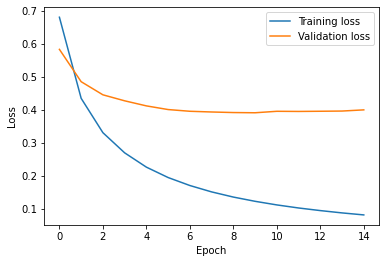

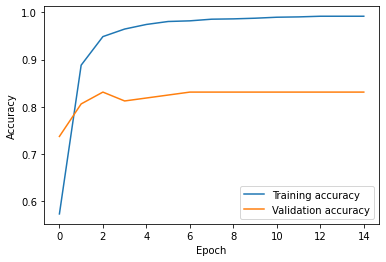

In [131]:
# Plot the training and validation loss

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Analysis

Overfitting is evident as the training loss falls more quickly than the validation loss after the first epoch. On the other hand the training accuracy is much more than the validation accuracy.

### 4.7 (1 mark)

Report the accuracy of your model on the test data. It should be quite close to the
validation accuracy.

In [133]:
# Metrics on the validation dataset using the best model (model with lowest validation loss)
evaluation = model.evaluate(val_transformed, val['in_genre'], return_dict=True)
print("Validation Loss:", evaluation['loss'])
print("Validation Accuracy:", evaluation['accuracy'])


--Validation Dataset--
5/5 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8313
Validation Loss: 0.3915986716747284
Validation Accuracy: 0.831250011920929


In [134]:
# Metrics on the test dataset using the best model (model with lowest validation loss)
evaluation = model.evaluate(test_transformed, test['in_genre'], return_dict=True)
print("Test Loss:", evaluation['loss'])
print("Test Accuracy:", evaluation['accuracy'])


13/13 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7950
Test Loss: 0.48395010828971863
Test Accuracy: 0.7950000166893005


## Analysis

The test accuracy of 0.795 is close to the validation accuracy of 0.831

### 4.8 (1 mark)

Extract the weights from the logistic regression layer, and match them up with the words in the
vocabulary.

Identify any vocabulary that is strongly associated with being in-genre or with being out-of-genre.

In [137]:
# Getting the weights
weights = model.get_weights()[0][:,0]

# get the vocabulary
vocabulary = vectorizer.get_vocabulary()

weights_df = pd.DataFrame({'word': vocabulary, 'weight': weights})

# sort the dataframe by weight
weights_df_top = weights_df.sort_values(by='weight', ascending=False)
weights_df_bot = weights_df.sort_values(by='weight', ascending=True)

print('Top 10 words with highest weights:')
print(weights_df_top.head(10))
print()
print('Top 10 words with lowest weights:')
print(weights_df_bot.head(10))

Top 10 words with highest weights:
          word    weight
20       music  0.200907
368     musicp  0.159052
117       rock  0.158167
104       band  0.157933
64     musical  0.150427
150    singing  0.143908
296  musicians  0.143785
121       idol  0.142565
256    variety  0.133200
178     talent  0.129993

Top 10 words with lowest weights:
          word    weight
644    protect -0.126326
1526  analysis -0.118100
936      build -0.113000
636     sports -0.110597
1306   daytime -0.109836
403     hidden -0.104046
3810    agents -0.100198
1197    sitcom -0.098508
1763  designer -0.098042
1500       cop -0.096665


### 4.9 (1 mark)

Create a description of a new show to pitch to someone at Macquarie's Film and Television School that is going to be strongly associated with your genre. If you are lacking inspiration, this is the kind of task that 
large language models do quite well.

Confirm that your model does correctly predict the genre.

In [146]:
### generated from ChatGPT with the prompt: a description of a TV show with the music genre in under 60 words

text = '"Harmonious Hits" is a captivating TV show that follows aspiring musicians on their journey to stardom. With its pulsating rhythm and soul-stirring melodies, this music-centered series showcases diverse genres like pop, rock, hip-hop, and more. Witness the exhilarating highs and heartbreaking lows as these talented artists harmonize their way through intense auditions, fierce competitions, and ultimately, the quest for a record deal.'

vectorized_text = vectorizer([text])
prediction = model.predict(vectorized_text)
print(f'Prediction: {prediction[0][0]}, In genre: {prediction[0][0] > 0.5}')

1/1 [==============================] - 0s 22ms/step
Prediction: 0.9875672459602356, In genre: True


## Analysis

The model provides a correct prediction with a probability of 0.9876

## Task 5 (2 marks) - embeddings

### Task 5.1 (2 marks)

Create a new model with an embedding layer, compile it, fit it and evaluate its performance on the training data
set.

Don't worry if it doesn't improve the model performance --- based on 
your answers to 2.3 we would expect an embedding layer to make it much worse, and based on 2.5 we would
expect a sequence-to-sequence model to perform poorly as well!

In [235]:
# Import the required libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

# Define the maximum number of words and tokenizer
tokenizer = Tokenizer(num_words=vocab_for_tuning+1, oov_token="[UNK]") 
tokenizer.fit_on_texts(training['description'])

# Convert words to indices
train_sequences = tokenizer.texts_to_sequences(training['description'])
val_sequences = tokenizer.texts_to_sequences(val['description'])
test_sequences = tokenizer.texts_to_sequences(test['description'])

# Define a function to pad sequences
def pad_seq(sequence, length):
    return pad_sequences(sequence, maxlen=length, truncating='post', padding='post')

# Pad sequences to the maximum length per document
padded_training = pad_seq(train_sequences, 250)
padded_validation = pad_seq(val_sequences, 250)
padded_test = pad_seq(test_sequences, 250)


In [233]:
# Building the embedded model

def build_model(possible_words, embedding_dim, possible_len):
    model = Sequential()
    model.add(Embedding(input_dim=possible_words, output_dim=embedding_dim, input_length=possible_len))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the parameters
embedding_dim = 200
possible_words = possible_words
possible_len = 250

# Build the model
model = build_model(possible_words, embedding_dim, possible_len)


# Compiling the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Providing the model summary
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 250, 200)          1497800   
                                                                 
 global_average_pooling1d_17  (None, 200)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_43 (Dense)            (None, 20)                4020      
                                                                 
 dense_44 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,501,841
Trainable params: 1,501,841
Non-trainable params: 0
_________________________________________________________________


In [234]:
# Train the model
history = model.fit(
    padded_training,  # Training data
    training['in_genre'],  # Labels for training data
    epochs=500,  # Number of epochs for training
    validation_data=(padded_validation, val['in_genre']),  # Validation data and labels
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]  # Early stopping callback
)

Epoch 1/500
45/45 [==============================] - 1s 14ms/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 2/500
45/45 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5222 - val_loss: 0.6903 - val_accuracy: 0.5750
Epoch 3/500
45/45 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5174 - val_loss: 0.6884 - val_accuracy: 0.6000
Epoch 4/500
45/45 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5507 - val_loss: 0.6848 - val_accuracy: 0.6000
Epoch 5/500
45/45 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.6805 - val_accuracy: 0.6000
Epoch 6/500
45/45 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.5847 - val_loss: 0.6752 - val_accuracy: 0.5938
Epoch 7/500
45/45 [==============================] - 1s 12ms/step - loss: 0.6836 - accuracy: 0.5785 - val_loss: 0.6745 - val_accuracy: 0.6062
Epoch 8/500

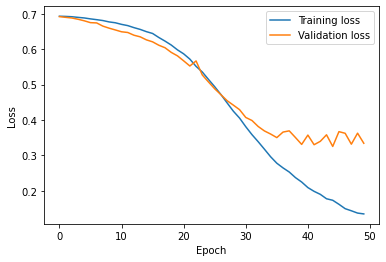

In [236]:
# Plotting the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

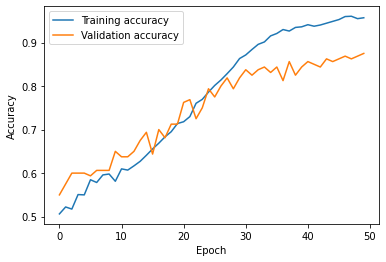

In [237]:
# Plotting the Accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfitting is not evident from the plots because both the Training and validation accuracy increase 

In [238]:
# Performance on test dataset
model.evaluate(padded_test, test['in_genre'], return_dict = True)

13/13 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8100


{'loss': 0.4436015784740448, 'accuracy': 0.8100000023841858}

## Analysis

The test accuracy is slightly better then task 4 at 0.81 compared to 0.7950